<div align="center">
    
# ΠΑΝΕΠΙΣΤΗΜΙΟ ΚΡΗΤΗΣ
# Τμήμα Επιστήμης Υπολογιστών

## HY-215: Εφαρμοσμένα Μαθηματικά για Μηχανικούς
## Εαρινό Εξάμηνο 2022-2023
### Διδάσκοντες: Γ. Στυλιανού, Γ. Καφεντζής
    
## Ανάθεση: 19-3-2023
## Παράδοση (ηλεκτρονικά, όπως αναφέρεται στην ιστοσελίδα του μαθήματος): 
## Σάββατο, 31-3-2023, 23:59:59
<h1><center>Άσκηση 5 [Υποχρεωτική]</center></h1>

In [9]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
%matplotlib inline

Τοποθετώντας ηλεκτρόδια σε διάφορες περιοχές της κεφαλής ανιχνεύουμε ηλεκτρικές δραστηριότητες (διαφορές δυναμικού) οι οποίες θεωρείται ότι αποτελούν μια έκφραση της εγκεφαλικής δραστηριότητας. Τέτοιες καταγραφές έχουν γίνει τόσο κατά το στάδιο του ύπνου όσο και κατά τη διάρκεια κάποιας έντονης δραστηριότητας (π.χ., όταν προσπαθείτε να λύσετε τις ασκήσεις στο ΗΥ215 :) ). Από κάθε ηλεκτρόδιο (σε συνδυασμό με ένα ηλεκτρόδιο αναφοράς) συλλέγουμε ένα σήμα όπου παρατηρούμε διαφορές δυναμικού μεταξύ των δυο.

Ένα σοβαρό πρόβλημα είναι η ανίχνευση των συχνοτήτων που υπάρχουν σε αυτές τις καταγραφές. Σε ορισμένες συχνότητες έχουμε αντιστοιχίσει κάποιους $\textit{ρυθμούς}$, όπως ονομάζονται, και οι οποίοι σηματοδοτούν κάτι ενδιαφέρον για την εγκεφαλική μας δραστηριότητα. Για παράδειγμα, η συχνότητα των $10$ Hz αντιστοιχεί στο **ρυθμό Άλφα**.


## Άσκηση:

Σας δίνουμε δυο καταγραφές διάρκειας ενός δευτερολέπτου η καθεμία. Η καταγραφή των δεδομένων έγινε λαμβάνοντας ένα δείγμα του σήματος συνεχούς χρόνου ανά $0.01$ δευτερόλεπτα. Ζητάμε να ελέγξετε αν αυτά τα σήματα έχουν ρυθμό Άλφα στο συχνοτικό τους περιεχόμενο (δηλ., αν έχουν ισχυρή φασματική συνιστώσα στα $10$ Hz). Οι ρυθμοί εμφανίζονται συνήθως στο εύρος συχνοτήτων $[3, 20]$ Hz, άρα θα στοχεύσουμε σε αυτό το διάστημα.

Για να εισάγετε τα δυο σήματα στην Python χρησιμοποιήστε την εντολή

In [10]:
mat = loadmat('EEG.mat')

και για να πάρετε τα δύο σήματα $x_1, x_2$ που περιέχει ως $\texttt{NumPy}$ πίνακες:

In [11]:
x1 = np.array(np.squeeze(mat["x1"]))
x2 = np.array(np.squeeze(mat["x2"]))

Με βάση τα παραπάνω, ο άξονας του χρόνου στην Python θα είναι:

In [12]:
dt = 0.01                                   # Βήμα στο χρόνο
t = np.arange(start=0, stop=1.001, step=dt)                      # Άξονας χρόνου σε ένα δευτερόλεπτο [0,1] με το παραπάνω βήμα


ενώ για τη συχνότητα θα είναι:

In [13]:
df = 0.01                                 # Βήμα στη συχνότητα
f =  np.arange(start=3, stop=20.001, step=df)                   # Άξονας συχνότητας στο [3,20] Hz με το παραπάνω βήμα


$\left(\alpha'\right)$ Ας απεικονίσουμε τα δυο σήματα στο χρόνο σε δυο γραφήματα με χρήση της συνάρτησης $\texttt{pyplot}$ της $\texttt{Matplotlib}$ και του άξονα $t$ που δημιουργήσαμε παραπάνω.

Text(0.5, 1.0, 'Εγκεφαλογραφήματα x1 και x2')

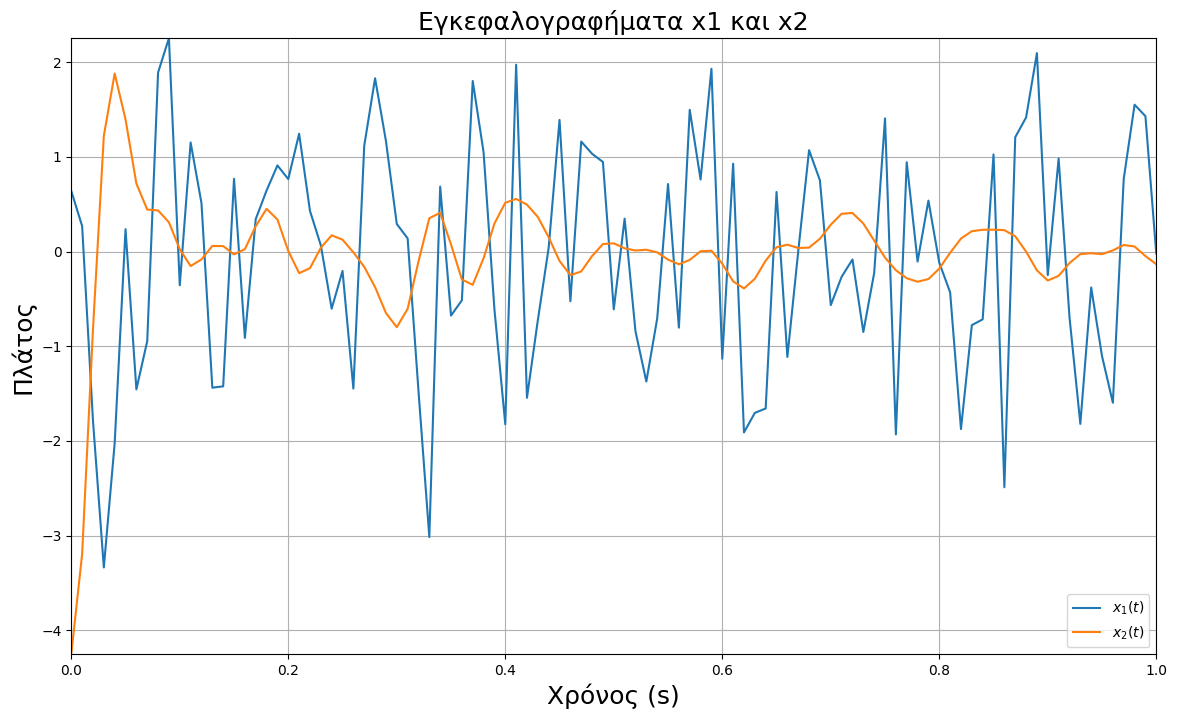

In [14]:
plt.figure(figsize=(14,8))
plt.plot(t, x1, label="$x_1(t)$")
plt.plot(t, x2, label="$x_2(t)$")
plt.xlim([t[0], t[-1]])
plt.ylim([min(np.concatenate((x1,x2))), max(np.concatenate((x1,x2)))])
plt.legend(loc=4)
plt.grid()
plt.xlabel('Χρόνος (s)', fontsize=18)
plt.ylabel('Πλάτος', fontsize=18)
plt.title('Εγκεφαλογραφήματα x1 και x2', fontsize=18)

$\left(\beta'\right)$ Θέλουμε να δούμε το φάσμα πλάτους (το μέτρο του μετασχηματισμού Fourier δηλαδή) των σημάτων αυτών για να αναγνωρίσουμε αν υπάρχει κάποια ισχυρή συνιστώσα στα $10$ Hz - δηλ. ο ρυθμός Άλφα. Χρησιμοποιήστε τον πίνακα ανάλυσης 

$$\large M = e^{-j2\pi ft}$$ 

όπως στην 1η Άσκηση Python αυτής της σειράς για να αναλύσετε τα δυο σήματα στο διάστημα $[3, 20]$ Hz.

In [15]:
ff = np.expand_dims(f, axis=0)  # Επέκταση του διανύσματος συχνότητας όπως έχουμε εξηγήσει στην 1η άσκηση python
tt = np.expand_dims(t, axis=0)  # Επέκταση του διανύσματος χρόνου, όμοια

M =  np.exp(-1j * 2 * np.pi * ff.T @ tt)        # Πίνακας ανάλυσης Fourier

MF1 =  df * x1 @ M.T       # Μετασχ. Fourier για το σήμα x1
MF2 =  df * x2 @M.T       # Μετασχ. Fourier για το σήμα x2

abs1 = np.abs(MF1)             # Φάσμα πλάτους Χ1(f)
abs2 = np.abs(MF2)             # Φάσμα πλάτους X2(f)

abs1 = np.squeeze(abs1)        # Απαλείφουμε την έξτρα διάσταση που βάλαμε πριν για καλύτερο χειρισμό στα γραφήματα
abs2 = np.squeeze(abs2)        # ----------------------------- "" -------------------------------------------------

Ας απεικονίσουμε τα δυο φάσματα πλάτους και ας δούμε αν υπάρχει κάποιος ρυθμός Άλφα:

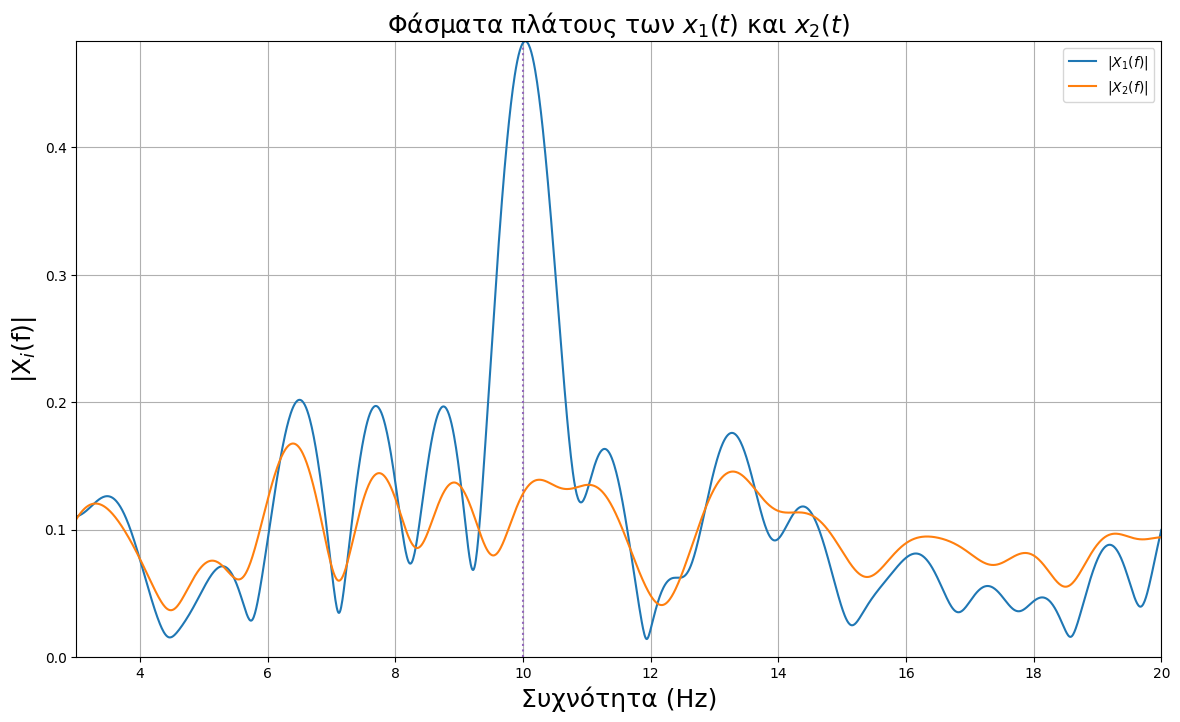

In [16]:
plt.figure(figsize=(14,8))
plt.plot([10, 10], [0, 0.5], linestyle=":", color=f"C{4}")
plt.plot(f, abs1, label="$|X_1(f)|$")
plt.plot(f, abs2, label="$|X_2(f)|$")
plt.plot([10, 11])
plt.xlim([f[0], f[-1]])
plt.ylim([0, max(np.concatenate((abs1, abs2)))])
plt.title("Φάσματα πλάτους των $x_1(t)$ και $x_2(t)$", fontsize=18)
plt.legend()
plt.xlabel('Συχνότητα (Hz)', fontsize=18)
plt.ylabel('|X$_i$(f)|', fontsize=18)
plt.grid()

## Απάντηση (για την παρουσία ρυθμού Άλφα):

Μπορουμε ξεκαθαρα να παρατηρησουμε οτι το x1 περιεχει ρυθμο Α αφου δεν αυτην την συχμοτητα παρατηρουμε spike

### ΠΡΟΣΟΧΗ: Το παραδοτέο αρχείο σας πρέπει να έχει όλα τα κελιά εκτελεσμένα! 

### Τρέξτε κάθε κελί του αρχείου, σώστε το, και καταθέστε το με τον τρόπο που περιγράφεται στην ιστοσελίδα.